# ITCS 3156-091 Final Project: Steam Review Sentiment Analysis

## Name: **Jason Khotsombath**

### Imports, Installs, and Utils

In [1]:
%pip install wordcloud
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Steam Review Dataset

<center><img src="https://storage.googleapis.com/kaggle-datasets-images/1754525/2865229/aacab271ac39a043c556e617d148bb94/dataset-cover.png?t=2021-11-29-10-49-35"
width="600"
height="300"></img></center>

For my project, we will be using the [Steam Review Dataset](https://www.kaggle.com/datasets/andrewmvd/steam-reviews/data) by user [Larxel](https://www.kaggle.com/andrewmvd). This dataset contains 6.4 million publically available English reviews of from the Steam Reviews segment of the Steam store ran by Valve in 2017. On the Kaggle, the author suggests you can create a sentiment analysis algorithm to predict scores given review text and explore sentiment with review topics across games and genres. We will be doing the first option to predict scores based on review text. This is important specifically for game developers to understand player reception to their games, trend analysis for specific mechanics based on review text, and allows insights into what features/mechanics players value the most.

**Inputs/Features**

| Name                          | Data Type   | Description | Provided in Dataset |
|-------------------------------|------------|-------------|---------------|
| Game ID                    | Quantitative               | ID of the Game stored in the Steam Database | True |
| Game Name              | Quantitative         | Name of the Game stored in the Steam Database | True 
| Review Text                 | Quantitative          | The text input of the review text for that review | True |
| Review Text Word Count         | Quantitative | Number of characters in the Review Text of that review | False |
| Review Votes | Quantitative | Whether the review was recommended by another user or not | True |

**Target**

| Name                          | Data Type  | Description | Provided in Dataset |
|-------------------------------|-------------|-------------|----|
| Review Score | Quantitative     |  Whether the game the review recommends the game or not | True |

# Data Loading

In [3]:
# Make sure you download the dataset and place it in the same directory as this file.
# If the dataset is named as "dataset.csv", rename it to "SteamReviews.csv"
# Warning: The dataset is large, ~1-1.5min to load
steam_reviews_df = pd.read_csv('SteamReviews.csv')

In [4]:
# Sample Size or it'll blow up your computer
steam_reviews_df = steam_reviews_df.sample(n=50000, random_state=np.random.randint(0,10000))

In [5]:
# Adding Word Count as a feature
steam_reviews_df['word_count'] = steam_reviews_df['review_text'].str.split().str.len()

In [6]:
steam_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 5070072 to 1668875
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_id        50000 non-null  int64  
 1   app_name      48602 non-null  object 
 2   review_text   49937 non-null  object 
 3   review_score  50000 non-null  int64  
 4   review_votes  50000 non-null  int64  
 5   word_count    49937 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.7+ MB


In [7]:
steam_reviews_df.describe()

,app_id,review_score,review_votes,word_count
count,50000.000000,50000.000000,50000.0000,49937.000000
mean,226936.844480,0.633680,0.1484,55.875243
std,126047.427999,0.773603,0.3555,108.935297
min,10.000000,-1.000000,0.0000,0.000000
25%,201472.500000,1.000000,0.0000,6.000000
50%,239140.000000,1.000000,0.0000,19.000000
75%,305380.000000,1.000000,0.0000,57.000000
max,565340.000000,1.000000,1.0000,1706.000000


# Visualization

## Numeric Features
### Correlation between all numeric features

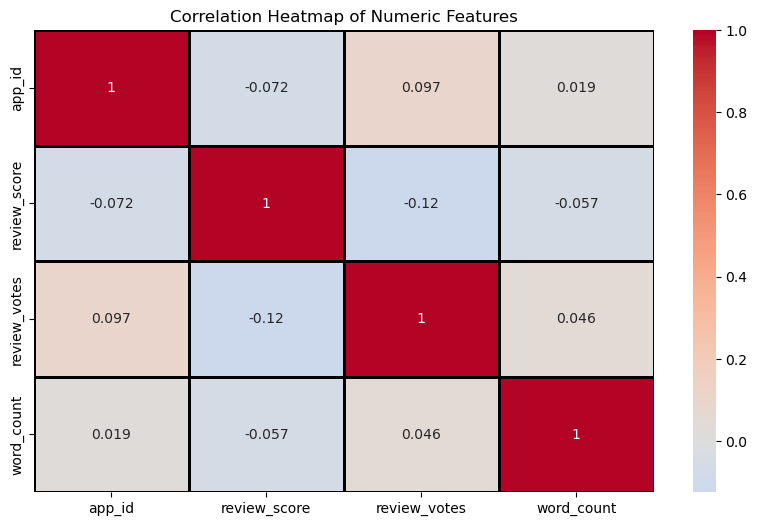

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = steam_reviews_df.drop(columns=['review_text', 'app_name'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black'),
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Word Count by Sentiment
### Distribution of word count by sentiment

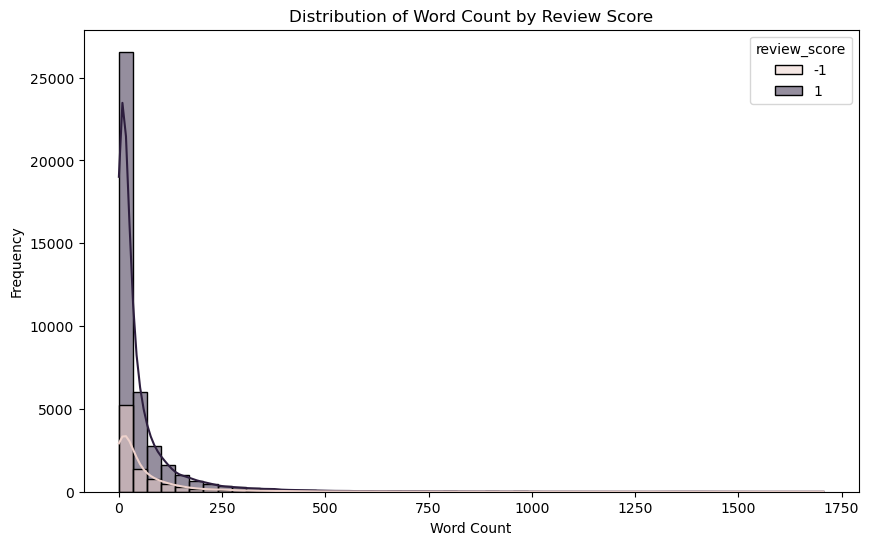

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=steam_reviews_df, x='word_count', hue='review_score', bins=50, kde=True)
plt.title('Distribution of Word Count by Review Score')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Game Distribution
### Top Games by review count

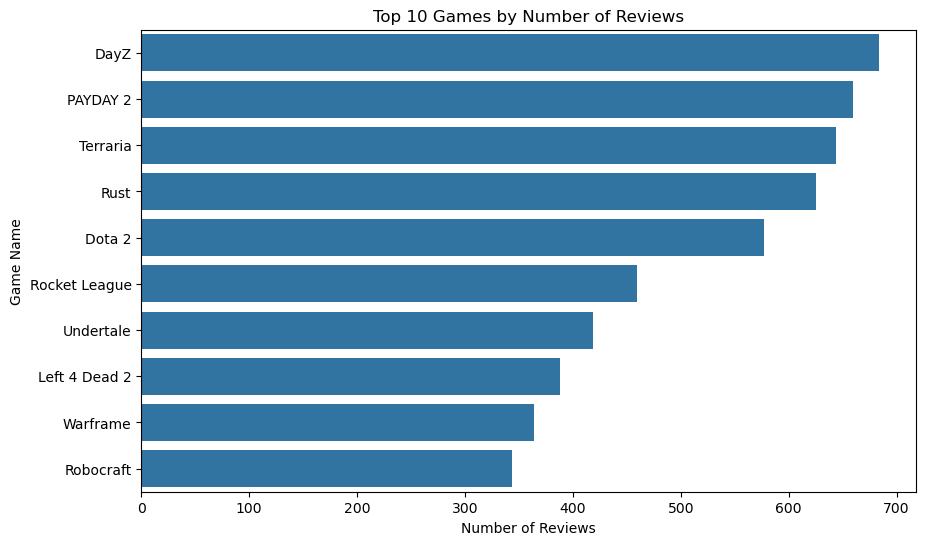

In [10]:
top_games_df = steam_reviews_df['app_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_games_df.values, y=top_games_df.index)
plt.title('Top 10 Games by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Game Name')
plt.show()

## Sentiment Score Distribution
### Pie Chart of Postive to Negative Reviews

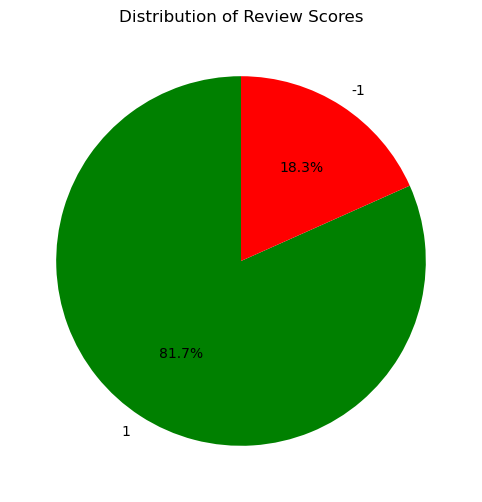

In [11]:
plt.figure(figsize=(10, 6))
steam_reviews_df['review_score'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Review Scores')
plt.ylabel('')
plt.show()

## Word Cloud
### Word clouds of the most common words for positive and negative reviews.

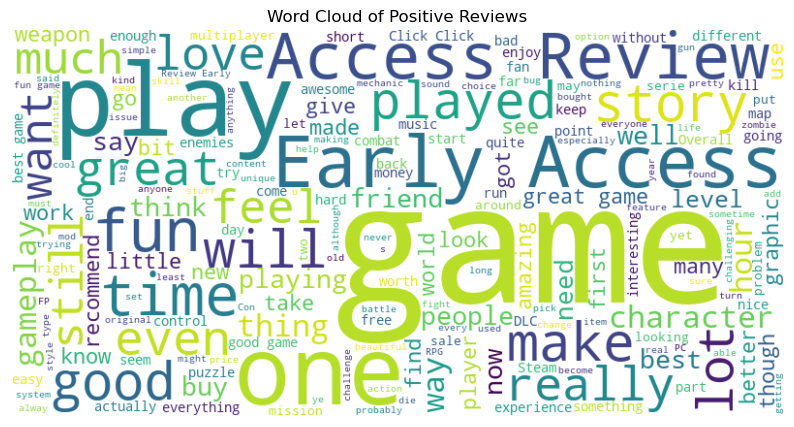

In [12]:
from wordcloud import WordCloud

steam_reviews_df['review_text'] = steam_reviews_df['review_text'].astype(str).replace('nan', '')
positive_text = ' '.join(steam_reviews_df[steam_reviews_df['review_score'] == 1]['review_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

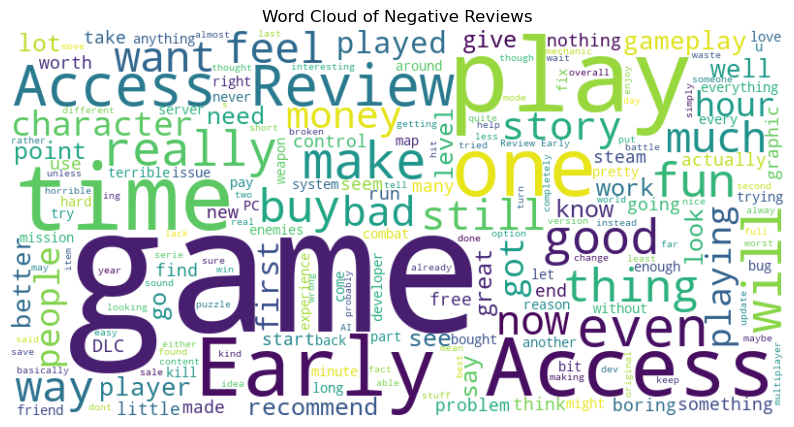

In [13]:
negative_text = ' '.join(steam_reviews_df[steam_reviews_df['review_score'] == -1]['review_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

## Review Length by Sentiment
### Correlation between the review score and the word count of the review.

Text(0, 0.5, 'Word Count')

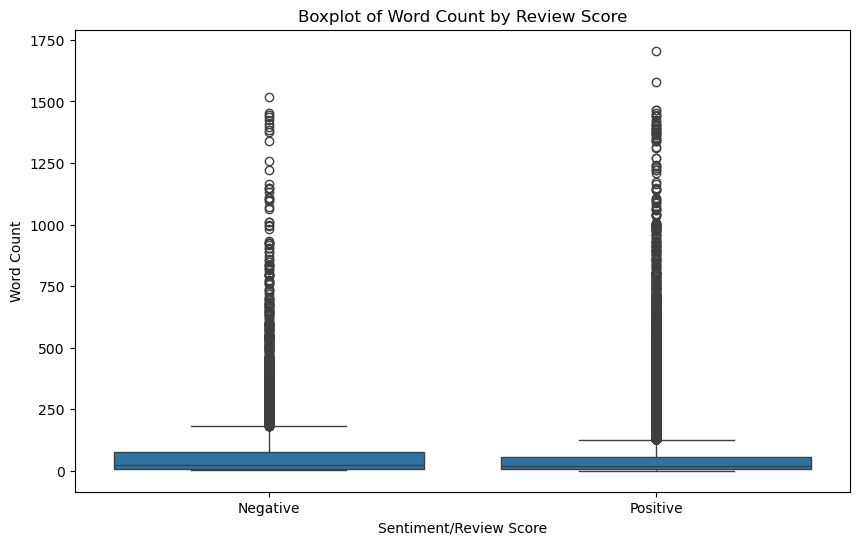

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='word_count', data=steam_reviews_df)
plt.title('Boxplot of Word Count by Review Score')
plt.xlabel('Sentiment/Review Score')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.ylabel('Word Count')

# Data Splitting and Preprocessing 

## Text Preprocessing
### The usage of text preprocessing is removing unnessecary values in our dataset such as: HTML Tags, URLs, special characters and numbers, and stop words (the, and, a, etc...). Additionally, we're tokenizing each of the words and pushing through a lemmatization tool (WordNet Lemmatizer).

In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path.append(nltk_data_path)

nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)


def preprocess_text(text:str) -> str:
    """
    Preprocess the text by removing special characters, converting to lowercase,
    removing stopwords, and lemmatizing the words.

    Args:
        text (str): The input text to preprocess.

    Returns:
        str: The cleaned and preprocessed text.
    """

    if not isinstance(text, str):
        return ''
    
    # Lowercase text
    text = text.lower()

    # Remove HTML tags, special characters, numbers, and URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Tokenize input
    nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')
    os.makedirs(nltk_data_path, exist_ok=True)
    nltk.data.path.insert(0, nltk_data_path)

    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Puts tokens back into a string
    processed_text = ' '.join(tokens)
    # print (f"Processed text: {processed_text}")
    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\jason\Documents\VSCode\ITCS_3156\Steam-
[nltk_data]     Review-Sentiment-Analysis\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\jason\Documents\VSCode\ITCS_3156\Steam-
[nltk_data]     Review-Sentiment-Analysis\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\jason\Documents\VSCode\ITCS_3156\Steam-
[nltk_data]     Review-Sentiment-Analysis\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\jason\Documents\VSCode\ITCS_3156\Steam-
[nltk_data]     Review-Sentiment-Analysis\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Feature Extraction
### Here we're extracting additional features to aid in predicating review/sentiment score. These values often correlate to review score.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def extract_features(df: pd.DataFrame, feature_extraction_method: str = 'tfidf') -> Tuple[object, object]:
    """
    Extract features from the review text using TF-IDF or Count Vectorization.

    Args:
        df (pd.DataFrame): The DataFrame containing the preprocessed text.
        feature_extraction_method (str): The method to use for feature extraction ('tfidf').

    Returns:
        Tuple: [X_train, y_train, X_valid, y_valid, X_test, y_test, vectorizer]
    """

    df['processed_text'] = df['review_text'].apply(preprocess_text)

    df['word_count'] = df['processed_text'].str.split().str.len()
    df['char_count'] = df['processed_text'].str.len()
    df['avg_word_length'] = df.apply(lambda x: x['char_count'] / x['word_count'] if x['word_count'] > 0 else 0, axis=1)
    df['punctuation_count'] = df['processed_text'].str.count(r'[^\w\s]')

    # Extract features using TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=5000)
    text_features = vectorizer.fit_transform(df['processed_text']).toarray()

    additional_features = df[['word_count', 'char_count', 'avg_word_length', 'punctuation_count']].values

    # Convert to sparse matrix
    X = np.hstack((text_features, additional_features))
    y = df['review_score'].values

    X_trn, X_tst, y_trn, y_tst =  train_test_split(X, y, test_size=0.2, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.25, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, vectorizer

## Data Processing
### Putting it all together

In [87]:
def get_preprocessed_data(df: pd.DataFrame, feature_extraction_method: str = 'tfidf') -> Tuple[object, object]:
    """
    Preprocess the data and extract features.

    Args:
        df (pd.DataFrame): The DataFrame containing the review text.
        feature_extraction_method (str): The method to use for feature extraction ('tfidf').

    Returns:
        Tuple: [X_train, y_train, X_valid, y_valid, X_test, y_test]
    """

    # Data Safety Check
    df['review_score'] = df['review_score'].apply(lambda x: 1 if x == 1 else -1)

    # Preprocess the data and extract features
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, vectorizer = extract_features(df, feature_extraction_method)

    text_feature_count = X_trn.shape[1] - 4  # Subtracting the number of additional features
    scaler = sklearn.preprocessing.StandardScaler()

    X_trn[:, -text_feature_count:] = scaler.fit_transform(X_trn[:, -text_feature_count:])
    X_vld[:, -text_feature_count:] = scaler.transform(X_vld[:, -text_feature_count:])
    X_tst[:, -text_feature_count:] = scaler.transform(X_tst[:, -text_feature_count:])

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1), vectorizer

In [91]:
def test_data_preprocessing_pipeline(df: pd.DataFrame = steam_reviews_df) -> bool:
    """
    Test the text preprocessing pipeline with sample reviews.
    """

    print("Testing the text preprocessing pipeline...")

    # Text Preprocessing Test
    sample_text = 'This is a www.testingL!ink.com with 123 numbers, <html> <b>tags</b>, and some punctuation!'
    processed = preprocess_text(sample_text)
    print(f"Original text: {sample_text}")
    print(f"Processed text: {processed}")

    assert isinstance(processed, str), "Processed text should be a string."
    assert len(processed) > 0, "Processed text should not be empty."
    assert all(char.isalpha() or char.isspace() for char in processed), "Processed text should only contain letters and spaces."
    assert 'www' not in processed, "Processed text should not contain URLs."
    assert '<html>' not in processed, "Processed text should not contain HTML tags."
    assert '123' not in processed, "Processed text should not contain numbers."
    assert '!' not in processed, "Processed text should not contain punctuation."

    print("Basic Text Processing Test passed!")

    test_df = df.head(100).copy()

    # Shape Test
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, vectorizer = extract_features(test_df)
    assert X_trn.shape[0] + X_vld.shape[0] + X_tst.shape[0] == 100, "Data split should preserve the number of samples."
    assert X_trn.shape[1] == X_vld.shape[1] == X_tst.shape[1], "Feature dimensions should match across splits."

    # Feature List Test
    assert 'word_count' in test_df.columns, "word_count should be in the DataFrame."
    assert 'char_count' in test_df.columns, "char_count should be in the DataFrame."
    assert 'avg_word_length' in test_df.columns, "avg_word_length should be in the DataFrame."
    assert 'punctuation_count' in test_df.columns, "punctuation_count should be in the DataFrame."

    # word_count Test
    sample_row = test_df.iloc[0]
    expected_word_count = len(sample_row['processed_text'].split())
    print(f"Sample processed text: {sample_row['processed_text']}")
    print(f"Expected word count: {expected_word_count}")
    assert sample_row['word_count'] == expected_word_count, "word_count should match the number of words in processed_text."
    print(f"Actual word count: {sample_row['word_count']}")

    print("Feature Extraction Test passed!")

    # Vectorizer Test
    vocab = vectorizer.get_feature_names_out()
    print(f"Vocabulary size: {len(vocab)}")
    assert len(vocab) > 0, "Vectorizer should have a non-empty vocabulary."
    assert len(vocab) <= 5000, "Vectorizer should have, at most, 5000 features."

    new_text = "This game is amazing!"
    new_text_vectorized = preprocess_text(new_text)
    transformed_text = vectorizer.transform([new_text_vectorized]).toarray()

    print(f"Transformed text shape: {transformed_text.shape}")
    print(f'Transformed text: {transformed_text}')
    assert transformed_text.shape[1] == len(vocab), "Transformed text should have the same number of features as the vocabulary."
    assert transformed_text.shape[0] == 1, "Transformed text should have one row."

    print("Vectorizer Test passed!")

    # End to End Test
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, vectorizer = get_preprocessed_data(test_df)

    text_feature_count = X_trn.shape[1] - 4  # Subtracting the number of additional features
    additional_feature_count = X_trn[:, text_feature_count:]
    assert abs(additional_feature_count.mean()) < 0.1, "Additional features should be centered around 0."
    assert abs(additional_feature_count.std() - 1.0) > 0.1, "Additional features should have some variance."

    print("End to End Test passed!")

    # Transformation Test
    assert set(np.unique(y_trn)) <= {-1, 1}, "y_train should only contain -1 and 1."
    assert y_trn.shape[1] == 1, "y_train should be a 2D array with one column."

    print("Transformation Test passed!")

    print("All tests passed!")
    return True


test_data_preprocessing_pipeline(steam_reviews_df)

Testing the text preprocessing pipeline...
Original text: This is a www.testingL!ink.com with 123 numbers, <html> <b>tags</b>, and some punctuation!
Processed text: number tag punctuation
Basic Text Processing Test passed!
Sample processed text: game weridest way find space gr
Expected word count: 6
Actual word count: 6
Feature Extraction Test passed!
Vocabulary size: 1378
Transformed text shape: (1, 1378)
Transformed text: [[0. 0. 0. ... 0. 0. 0.]]
Vectorizer Test passed!
End to End Test passed!
Transformation Test passed!
All tests passed!


True